<a href="https://colab.research.google.com/github/ndubuisijosephalx/Data-Science-projects/blob/main/nlp_Ndubuisi_J_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!jupyter contrib nbextension install --user

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

#!jupyter nbextension enable hinterland/hinterland

In [ ]:
!pip install scikit-plot

In [ ]:
#!pip install langdetect
!pip install langid

# Import the Required Libraries for the Project Task

In [ ]:
from spacy.lang.en import English
import langid
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay
import spacy
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import string
from langdetect import detect
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import scikitplot as skplt
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.svm import SVC
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [ ]:
#Download NLTK resources (only needed if not downloaded previously)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load the Corpus as Csv

In [ ]:
# Set 'display.max_colwidth' to None to show the full content of all columns
#pd.set_option('display.max_colwidth', None)

# Set 'display.max_rows' to None to show all rows without truncation
#pd.set_option('display.max_rows', None)

In [ ]:
#resume_corpus = pd.read_csv(r"C:\Users\HP\Desktop\dataset\Resume.csv",sep=',')
resume_corpus = pd.read_csv("/content/drive/MyDrive/Msc Reinforcement learning/Resume.csv",sep=',')

In [ ]:
resume_corpus.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [ ]:
resume_corpus.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')

In [ ]:
resume_corpus.shape

(2484, 4)

# Class Percentage

In [ ]:
# Compute the class percentage
class_percentage = resume_corpus['Category'].value_counts()/len(resume_corpus)*100
# diplay the result
class_percentage

INFORMATION-TECHNOLOGY    4.830918
BUSINESS-DEVELOPMENT      4.830918
FINANCE                   4.750403
ADVOCATE                  4.750403
ACCOUNTANT                4.750403
ENGINEERING               4.750403
CHEF                      4.750403
AVIATION                  4.710145
FITNESS                   4.710145
SALES                     4.669887
BANKING                   4.629630
HEALTHCARE                4.629630
CONSULTANT                4.629630
CONSTRUCTION              4.508857
PUBLIC-RELATIONS          4.468599
HR                        4.428341
DESIGNER                  4.307568
ARTS                      4.146538
TEACHER                   4.106280
APPAREL                   3.904992
DIGITAL-MEDIA             3.864734
AGRICULTURE               2.536232
AUTOMOBILE                1.449275
BPO                       0.885668
Name: Category, dtype: float64

# Class Frequency

In [ ]:
class_frequency = resume_corpus.Category.value_counts()
class_frequency

INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

# Visualise the Class Frequency

<Axes: >

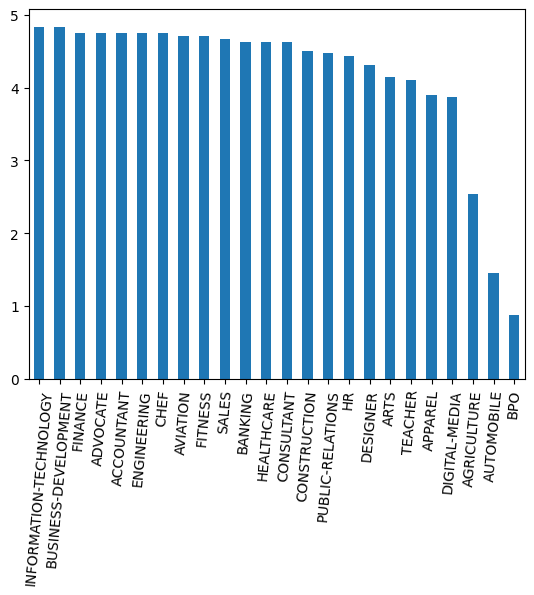

In [ ]:
class_percentage.plot(kind = 'bar',rot=85)

# Visualise the Class Frequency and Percentage

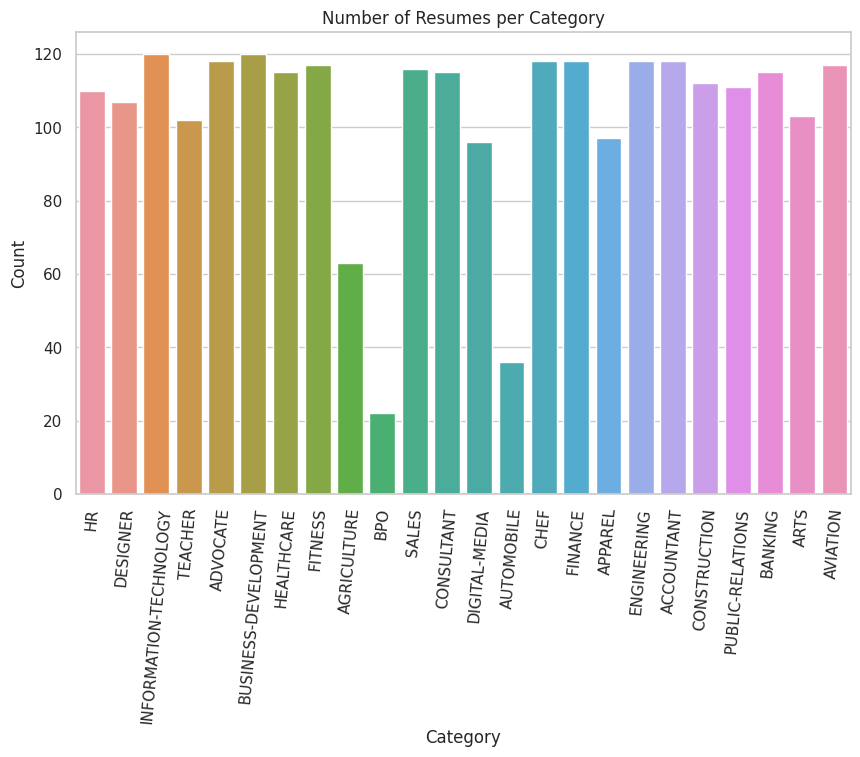

In [ ]:
# Plotting the value counts of the 'Category' column as a bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=resume_corpus)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Resumes per Category')
plt.xticks(rotation=85)
plt.show()

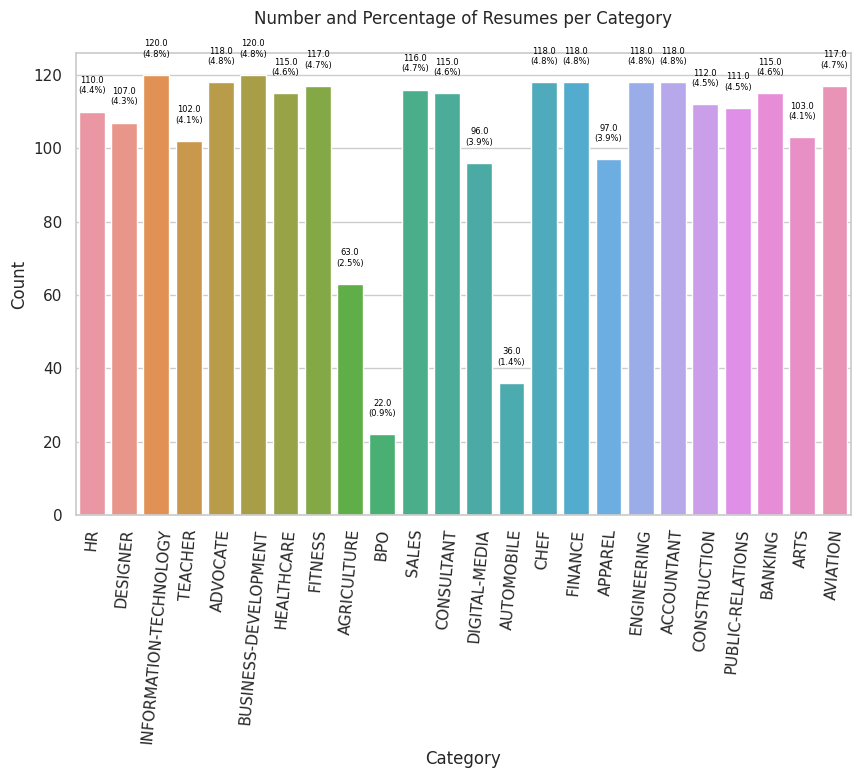

In [ ]:
category_counts = resume_corpus['Category'].value_counts()
total_resumes = len(resume_corpus)
category_percentages = (category_counts / total_resumes) * 100

# Plotting the value counts of the 'Category' column as a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Category', data=resume_corpus)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number and Percentage of Resumes per Category\n')

# Add percentage values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height}\n({height/total_resumes*100:.1f}%)',
            ha='center', fontsize=6, color='black')

plt.xticks(rotation=85)
plt.show()

# Check for Missing or Null Values

In [ ]:
resume_corpus.isna().sum()

ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

## View How the class are distributed

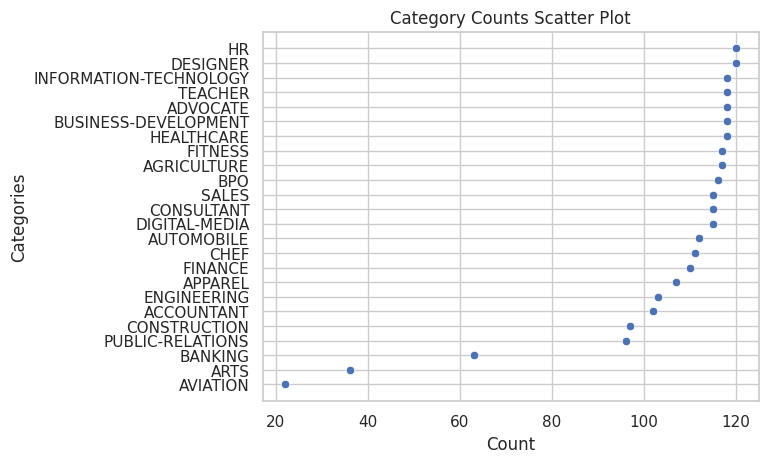

In [ ]:

# Plot the scatterplot with the y-axis (count) on the x-axis and the x-axis labels on the y-axis
sns.scatterplot(x=category_counts, y=resume_corpus['Category'].unique())

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Category Counts Scatter Plot')

# Show the plot
plt.show()

# Examine the information about the corpus

In [ ]:
resume_corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [ ]:
resume_corpus.Category.nunique()

24

In [ ]:

# View number of unique words
resume_corpus.nunique()

ID             2484
Resume_str     2482
Resume_html    2482
Category         24
dtype: int64

In [ ]:
resume_corpus.duplicated().sum()

0

In [ ]:

# View unique strings
resume_corpus.Resume_str.unique()

array(["         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, 

# Feature Engineering and Exploratory Data Analysis

## Identify Languages in each row of Resume the Resume Column

In [ ]:

# Step 1: Language Identification
def identify_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'

resume_corpus['Language'] = resume_corpus['Resume_str'].apply(identify_language)

resume_corpus

,ID,Resume_str,Resume_html,Category,Language
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,en
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,en
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,en
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,en
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,en
...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,en
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,en
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,en
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,en


## Identify non-english language in the resume rows

In [ ]:
resume_corpus[resume_corpus['Language']!='en']

,ID,Resume_str,Resume_html,Category,Language
656,12632728,,"<div class=""fontsize fontface vmargins hmargin...",BUSINESS-DEVELOPMENT,unknown
1948,12491898,Work History Company Name ...,"<div class=""fontsize fontface vmargins hmargin...",CONSTRUCTION,es


## Retrieve the Length and Number of Puctuation in each row in the Resume column

In [ ]:
#resume_corpus = pd.DataFrame(data)

# Step 1: Create a function to count punctuation characters and length
def count_punctuations_and_length(text):
    num_punctuations = sum(1 for char in text if char in string.punctuation)
    text_length = len(text)
    return pd.Series([num_punctuations, text_length])

# Step 2: Apply the function to the 'Resume_str' column and assign to new columns
resume_corpus[['Punctuation_Count', 'Text_Length']] = resume_corpus['Resume_str'].apply(count_punctuations_and_length)
# Step 3: Display the updated DataFrame
display(resume_corpus.iloc[:10][:8])

,ID,Resume_str,Resume_html,Category,Language,Punctuation_Count,Text_Length
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,en,143,5442
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,en,119,5572
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,en,197,7720
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,en,46,2855
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,en,274,9172
5,11592605,HR GENERALIST Summary Dedic...,"<div class=""fontsize fontface vmargins hmargin...",HR,en,142,5480
6,25824789,HR MANAGER Summary HUMAN RES...,"<div class=""fontsize fontface vmargins hmargin...",HR,en,143,5250
7,15375009,HR MANAGER Professional Summa...,"<div class=""fontsize fontface vmargins hmargin...",HR,en,229,9033


## Count the number of words in each resume rows

In [ ]:
# Step 1: Create a CountVectorizer to calculate word frequencies
count_vectorizer = CountVectorizer()

# Step 2: Fit and transform the 'Resume_str' column to get word frequencies
word_frequencies = count_vectorizer.fit_transform(resume_corpus['Resume_str'])

# Step 3: Get the feature names (words) from the CountVectorizer
feature_names = count_vectorizer.get_feature_names_out()

# Step 4: Create a DataFrame for word frequencies and add to the original DataFrame
word_freq_df = pd.DataFrame(word_frequencies.toarray(), columns=[f"{word}_freq" for word in feature_names])
resume_corpus = pd.concat([resume_corpus, word_freq_df], axis=1)

# Step 5: Display the updated DataFrame
display(resume_corpus)

,ID,Resume_str,Resume_html,Category,Language,Punctuation_Count,Text_Length,00_freq,000_freq,0001_freq,...,zzxzx_freq,µpg_freq,çatalhöyük_freq,école_freq,ética_freq,étiquette_freq,éxito_freq,òwaterfalló_freq,últimos_freq,ﬁlm_freq
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,en,143,5442,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,en,119,5572,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,en,197,7720,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,en,46,2855,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,en,274,9172,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,en,134,5533,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION,en,166,7108,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,en,55,2020,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION,en,161,5074,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
resorcePunctuation_CountText_Length

# Data Cleaning

In [ ]:
# Drop unwanted columns
resume_corpus.columns

Index(['ID', 'Resume_str', 'Resume_html', 'Category', 'Language',
       'Punctuation_Count', 'Text_Length', '00_freq', '000_freq', '0001_freq',
       ...
       'zzxzx_freq', 'µpg_freq', 'çatalhöyük_freq', 'école_freq', 'ética_freq',
       'étiquette_freq', 'éxito_freq', 'òwaterfalló_freq', 'últimos_freq',
       'ﬁlm_freq'],
      dtype='object', length=40531)

In [ ]:
# Drop unwanted columns
resume_corpus_refined  = resume_corpus.drop(columns=['ID','Resume_html'])
resume_corpus_refined.head()

,Resume_str,Category,Language,Punctuation_Count,Text_Length,00_freq,000_freq,0001_freq,00019_freq,000401_freq,...,zzxzx_freq,µpg_freq,çatalhöyük_freq,école_freq,ética_freq,étiquette_freq,éxito_freq,òwaterfalló_freq,últimos_freq,ﬁlm_freq
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,en,143,5442,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,en,119,5572,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HR DIRECTOR Summary Over 2...,HR,en,197,7720,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HR SPECIALIST Summary Dedica...,HR,en,46,2855,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HR MANAGER Skill Highlights ...,HR,en,274,9172,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Rename the Category to class for clarity

In [ ]:
# Renaming the 'Category' column to 'class'
resume_corpus_refined.rename(columns={'Category': 'class','Resume_Str':'resume'}, inplace=True)

# Convert the class strings to numerical labels

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'class' column to numerical labels
resume_corpus_refined['class_numerical'] = label_encoder.fit_transform(resume_corpus_refined['class'])

# Display the updated DataFrame
display(resume_corpus_refined.head())

,Resume_str,class,Language,Punctuation_Count,Text_Length,00_freq,000_freq,0001_freq,00019_freq,000401_freq,...,µpg_freq,çatalhöyük_freq,école_freq,ética_freq,étiquette_freq,éxito_freq,òwaterfalló_freq,últimos_freq,ﬁlm_freq,class_numerical
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,en,143,5442,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,en,119,5572,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
2,HR DIRECTOR Summary Over 2...,HR,en,197,7720,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
3,HR SPECIALIST Summary Dedica...,HR,en,46,2855,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
4,HR MANAGER Skill Highlights ...,HR,en,274,9172,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19


In [ ]:
# Get the unique values of the 'class' column
unique_class_values = resume_corpus_refined['class'].unique()

# Get the unique values of the 'class_numerical' column
unique_class_numerical_values = resume_corpus_refined['class_numerical'].unique()

# Create a dictionary matching unique class values with numerical class values
class_mapping_dict = {class_value: class_numerical_value for class_value, class_numerical_value in zip(unique_class_values, unique_class_numerical_values)}

# Print the unique values and their corresponding numerical values together
print("Unique values and their corresponding numerical values:")
for class_value, class_numerical_value in class_mapping_dict.items():
    print(f"'{class_value}' -> {class_numerical_value}")

Unique values and their corresponding numerical values:
'HR' -> 19
'DESIGNER' -> 13
'INFORMATION-TECHNOLOGY' -> 20
'TEACHER' -> 23
'ADVOCATE' -> 1
'BUSINESS-DEVELOPMENT' -> 9
'HEALTHCARE' -> 18
'FITNESS' -> 17
'AGRICULTURE' -> 2
'BPO' -> 8
'SALES' -> 22
'CONSULTANT' -> 12
'DIGITAL-MEDIA' -> 14
'AUTOMOBILE' -> 5
'CHEF' -> 10
'FINANCE' -> 16
'APPAREL' -> 3
'ENGINEERING' -> 15
'ACCOUNTANT' -> 0
'CONSTRUCTION' -> 11
'PUBLIC-RELATIONS' -> 21
'BANKING' -> 7
'ARTS' -> 4
'AVIATION' -> 6


## Get the Class Labels

In [ ]:
resume_corpus_refined['class'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [ ]:
# Create a mapping dictionary for the 'class' column
class_mapping = {category: i for i, category in enumerate(resume_corpus_refined['class'].unique())}

# Map the 'class' column to numerical values
resume_corpus_refined['class_numerical'] = resume_corpus_refined['class'].map(class_mapping)

# Display the updated DataFrame
display(resume_corpus_refined.head())

,Resume_str,class,Language,Punctuation_Count,Text_Length,00_freq,000_freq,0001_freq,00019_freq,000401_freq,...,µpg_freq,çatalhöyük_freq,école_freq,ética_freq,étiquette_freq,éxito_freq,òwaterfalló_freq,últimos_freq,ﬁlm_freq,class_numerical
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,en,143,5442,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,en,119,5572,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HR DIRECTOR Summary Over 2...,HR,en,197,7720,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HR SPECIALIST Summary Dedica...,HR,en,46,2855,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HR MANAGER Skill Highlights ...,HR,en,274,9172,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Text Preprocessing

## Method 1: Preprocess Text with nltk

In [ ]:
#nltk.download('omw')

In [ ]:
import nltk
#nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
# Text preprocessing function
def preprocess_text_nltk(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove special characters and numbers
    tokens = [token for token in tokens if token.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if token not in stop_words]
    # Perform stemming or lemmatization (choose one)
    porter = PorterStemmer()
    tokens = [porter.stem(token) for token in tokens]
    #lemmatizer = WordNetLemmatizer()
    #tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return " ".join(tokens)

# Apply preprocessing to 'Resume_str' column
resume_corpus_refined['Cleaned_Resume'] = resume_corpus_refined['resume'].apply(preprocess_text_nltk)

# Now cv_data['Cleaned_Resume'] column contains the preprocessed text data

# Print a sample preprocessed resume
print(resume_corpus_refined['Cleaned_Resume'].iloc[0])

KeyError: ignored

## Vectorize Text with TFIDF

In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Cleaned_Resume' text data into TF-IDF vectors
tfidf_vectors = tfidf_vectorizer.fit_transform(resume_corpus_refined['Cleaned_Resume'])

# Convert the TF-IDF vectors to a DataFrame for better readability (optional)
tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Now you have the preprocessed text data represented as TF-IDF vectors in 'tfidf_vectors'
# The 'tfidf_df' DataFrame contains the same information but in a more readable format

# Print the first few rows of the 'tfidf_df' DataFrame
display(tfidf_df.head())

## Display non-zero vectors

In [ ]:
# Create a new DataFrame to store non-zero TF-IDF scores for each document
non_zero_tfidf_df = tfidf_df[tfidf_df > 0]

# Get the number of non-zero values for each term (feature)
num_non_zero_values = non_zero_tfidf_df.notnull().sum()

# Repeat the feature names based on the number of non-zero values for each feature
feature_names_repeated = feature_names.repeat(num_non_zero_values)

# Flatten the non-zero values for each document
non_zero_values = non_zero_tfidf_df.stack()

# Create a new DataFrame with the non-zero TF-IDF scores and their corresponding feature names
non_zero_tfidf_df = pd.DataFrame({'TF-IDF Score': non_zero_values.values}, index=feature_names_repeated)

# Display the DataFrame with non-zero TF-IDF scores and their feature names
display(non_zero_tfidf_df)

# Build the First Baseline Model with our TFIDF Vector

## Model 1: Logistic Regression Classifier

X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size = 0.2, random_state = 0, stratify = data['label'])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, resume_corpus_refined['class_numerical'], test_size=0.2, random_state=0,stratify = resume_corpus_refined['class_numerical'])

# Initialize the logistic regression classifier
classifier = LogisticRegression()

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

## Compute and plot the confusion matrix for the baseline model(Model 1)

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using plot_confusion_matrix
plt.figure(figsize=(10,9))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, values_format='.2f',cmap='Blues')
plt.show()

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

## Model 2 :Support Vector Machine Classifier with ITIDF Vectors

In [ ]:

# Initialize the Support Vector Machine (SVM) classifier
# For binary classification, use SVC(kernel='linear')
# For multiclass classification, use SVC(kernel='linear', decision_function_shape='ovr') or SVC(kernel='linear', decision_function_shape='ovo')
svm_classifier = SVC(kernel='linear', decision_function_shape='ovr')

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_2 = svm_classifier.predict(X_test)
y_pred_2

## Plot the Confusion Matrix

In [ ]:

# Create a confusion matrix
cm_2 = confusion_matrix(y_test, y_pred_2)

# Calculate the percentages
cm_percentage_2 = cm_2.astype('float') / cm_2.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels = resume_corpus_refined['class'].unique()

# Create a single plot for confusion matrix with percentages
plt.figure(figsize=(12, 10))

# Plot the heatmap of the confusion matrix (percentages)
sns.heatmap(cm_percentage_2, annot=True, fmt=".2f", cmap='Blues', cbar=True, xticklabels=class_labels, yticklabels=class_labels)

# Plot the numbers as text on top of the percentages heatmap
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j + 0.5, i + 0.5, f"{cm_2[i, j]}", ha='center', va='center', color='black', fontsize=6)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix with Percentages')
plt.show()

In [ ]:

class_labels = resume_corpus_refined['class'].unique()

# Calculate percentages
cm_percent = cm_2.astype('float') / cm_2.sum(axis=1)[:, np.newaxis] * 100

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot confusion matrix as numbers and percentages
sns.heatmap(cm_2, annot=False, fmt='d', cmap='Blues', cbar=False, ax=ax)

# Create a new loop to add percentages as annotations
for i in range(cm_2.shape[0]):
    for j in range(cm_2.shape[1]):
        ax.text(j + 0.5, i + 0.5, f'{cm_2[i, j]} ({cm_percent[i, j]:.1f}%)',
                ha='center', va='center', color='black', fontsize=6)

# Set axis labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix\nNumbers and Percentages')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Create a confusion matrix
cm_2 = confusion_matrix(y_test, y_pred_2)

# Calculate the percentages
cm_percentage_2 = cm_2.astype('float') / cm_2.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentages)')
plt.show()

##  Evaluate the Model Performance

In [ ]:
# Evaluate the model's performance
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("Accuracy:", accuracy)

report_2 = classification_report(y_test, y_pred_2)
print("Classification Report:\n", report_2)

## Model 3: Random Forest Model

In [ ]:

# plit the data into training and testing sets
#X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(tfidf_vectors, resume_corpus_refined['class'], test_size=0.2, random_state=42)

# Initialize the Random Forest classifier with different variable names
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_classifier.predict(X_test)

# Create a confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate the percentages
cm_percentage_rf = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels_rf = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels for Random Forest model
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels_rf, yticklabels=class_labels_rf)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage_rf, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels_rf, yticklabels=class_labels_rf)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Confusion Matrix (Percentages)')
plt.show()

## Evaluate the Model Performance

In [ ]:
# Evaluate the Random Forest model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)

In [ ]:
#!python -m spacy download en_core_web_lg

# Preprocess Text with Spacy

## Examing the First Resume Content

In [ ]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(resume_corpus_refined['resume'][0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_,token.is_oov,token.has_vector,token.is_stop)

In [ ]:
doc.has_vector

## Process the Text

In [ ]:


# Load the English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Define a function to preprocess text using spaCy
def preprocess_text_spacy(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and punctuation using spaCy tokenizer
    doc = nlp(text)
    words = [token.text for token in doc if token.is_alpha]

    # Remove stopwords using spaCy
    words = [token.text for token in doc if not token.is_stop]

    # Lemmatize the words using spaCy
    words = [token.lemma_ for token in doc]

    # Join the processed words back into a single string
    processed_text = ' '.join(words)

    return processed_text

# Assuming 'resume_corpus_refined' is a list of resume texts
preprocessed_resumes_spacy = [preprocess_text_spacy(resume) for resume in resume_corpus_refined['resume']]

In [ ]:
# display preprocessed text
resume_corpus_refined['cleaned_resume'] = preprocessed_resumes_spacy
resume_corpus_refined

In [ ]:
# Capture out-of-vocabulary (OOV) words
oov_words = set()
doc = nlp(resume_corpus_refined['cleaned_resume'].to_string())
for token in doc:
    if not token.has_vector:  # Check if the word has a vector representation (i.e., recognized by the model)
        oov_words.add(token.text)

print("Out-of-Vocabulary (OOV) Words:", oov_words)

In [ ]:
cd C:\Users\HP\Desktop\Msc Reinforcement learning\

In [ ]:
path = r"C:\Users\HP\Desktop\Msc Reinforcement learning\en_core_web_lg-3.6.0-py3-none-any.whl"

In [ ]:
import wheel
import zipfile
import os

# Replace "path/to/en_core_web_lg-3.6.0-py3-none-any.whl" with the actual path to your wheel file
wheel_file_path = r"C:\Users\HP\Desktop\Msc Reinforcement learning\en_core_web_lg-3.6.0-py3-none-any.whl"

# Create a directory to extract the contents of the wheel file
extracted_dir = r"C:\Users\HP\Desktop\Msc Reinforcement learning"
os.makedirs(extracted_dir, exist_ok=True)

# Extract the wheel file
with zipfile.ZipFile(wheel_file_path, "r") as zip_ref:
    zip_ref.extractall(extracted_dir)

In [ ]:
path = r"C:\Users\HP\Desktop\Msc Reinforcement learning\en_core_web_lg\en_core_web_lg-3.6.0"

In [ ]:
nlp_lg = spacy.load(path)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the spaCy English language model "en_core_web_lg"
#nlp_lg = spacy.load(r"C:\Users\HP\Desktop\Msc Reinforcement learning\en_core_web_lg-3.6.0-py3-none-any.whl")

# Assuming you have already loaded the data into a DataFrame named resume_corpus_refined
# resume_corpus_refined = pd.read_csv("path_to_your_csv_file.csv")

# Text preprocessing function using spaCy with the "en_core_web_lg" model
def preprocess_text_spacy_lg(text):
    doc = nlp_lg(text)
    # Your preprocessing code using spaCy with "en_core_web_lg" (e.g., lemmatization, removing stop words, etc.)
    processed_text = " ".join([token.lemma_ for token in doc if not token.is_stop])
    return processed_text

# Apply preprocessing using spaCy to 'Resume_str' column if not done earlier
resume_corpus_refined['Cleaned_Resume_lg'] = resume_corpus_refined['Resume'].apply(preprocess_text_spacy_lg)

# Initialize the TF-IDF Vectorizer for the "en_core_web_lg" processed text
embedding_vectorizer_lg = [token.vector for token in doc]

# Convert the list of embeddings to a numpy array
embedding_vectors_lg = np.array(embedding_vectorizer_lg)
# Split the data into training and testing sets
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(embedding_vectors_lg, resume_corpus_refined['class'], test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier for "en_core_web_lg" processed text with different variable names
naive_bayes_classifier_lg = MultinomialNB()

# Train the Multinomial Naive Bayes classifier on the training data
naive_bayes_classifier_lg.fit(X_train_lg, y_train_lg)

# Make predictions on the test data
y_pred_lg = naive_bayes_classifier_lg.predict(X_test_lg)

y_pred_lg[:10]

In [ ]:
# Text preprocessing function using spaCy with the "en_core_web_lg" model
def preprocess_text_spacy_lg(text):
    doc = nlp_lg(text)
    # Your preprocessing code using spaCy with "en_core_web_lg" (e.g., lemmatization, removing stop words, etc.)
    processed_text = " ".join([token.lemma_ for token in doc if not token.is_stop])
    return processed_text

# Apply preprocessing using spaCy to 'Resume_str' column if not done earlier
resume_corpus_refined['Cleaned_Resume_lg'] = resume_corpus_refined['Resume'].apply(preprocess_text_spacy_lg)

# Create a vector representation for each document using the embeddings of "en_core_web_lg"
embedding_vectors_lg = np.array([doc.vector for doc in nlp_lg.pipe(resume_corpus_refined['Cleaned_Resume_lg'])])

# Split the data into training and testing sets
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(embedding_vectors_lg, resume_corpus_refined['Category'], test_size=0.2, random_state=42)

# Initialize the Multinomial Naive Bayes classifier for "en_core_web_lg" processed text with different variable names
naive_bayes_classifier_lg = MultinomialNB()

# Train the Multinomial Naive Bayes classifier on the training data
naive_bayes_classifier_lg.fit(X_train_lg, y_train_lg)

# Make predictions on the test data
y_pred_lg = naive_bayes_classifier_lg.predict(X_test_lg)

# View the first 10 predictions
print(y_pred_lg[:10])

# Plot the Confusion Matrix

In [ ]:
# Create a confusion matrix
cm_lg = confusion_matrix(y_test_lg, y_pred_lg)

# Calculate the percentages
cm_percentage_lg = cm_lg.astype('float') / cm_lg.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels_lg = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels for the Multinomial Naive Bayes model with "en_core_web_lg"
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels_lg, yticklabels=class_labels_lg)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Multinomial Naive Bayes Confusion Matrix with en_core_web_lg (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage_lg, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels_lg, yticklabels=class_labels_lg)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Multinomial Naive Bayes Confusion Matrix with en_core_web_lg (Percentages)')
plt.show()

# Evaluate the Model Performance

In [ ]:

# Evaluate the Multinomial Naive Bayes model's performance with "en_core_web_lg" processed text
accuracy_lg = accuracy_score(y_test_lg, y_pred_lg)
print("Multinomial Naive Bayes Accuracy with en_core_web_lg:", accuracy_lg)

report_lg = classification_report(y_test_lg, y_pred_lg)
print("Multinomial Naive Bayes Classification Report with en_core_web_lg:\n", report_lg)

In [ ]:

# Apply preprocessing using spaCy to 'Resume_str' column if not done earlier
resume_corpus_refined['cleaned_Resume'] = resume_corpus_refined['resume'].apply(preprocess_text_spacy)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer_spacy = TfidfVectorizer()

# Fit and transform the 'Cleaned_Resume' text data into TF-IDF vectors
tfidf_vectors_spacy = tfidf_vectorizer_spacy.fit_transform(resume_corpus_refined['cleaned_resume'])

# Split the data into training and testing sets
X_train_spacy, X_test_spacy, y_train_spacy, y_test_spacy = train_test_split(tfidf_vectors_spacy, resume_corpus_refined['class'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier with different variable names
logistic_classifier_spacy = LogisticRegression(max_iter=1000, random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier_spacy.fit(X_train_spacy, y_train_spacy)

# Make predictions on the test data
y_pred_spacy = logistic_classifier_spacy.predict(X_test_spacy)

# Create a confusion matrix
cm_spacy = confusion_matrix(y_test_spacy, y_pred_spacy)

# Calculate the percentages
cm_percentage_spacy = cm_spacy.astype('float') / cm_spacy.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels_spacy = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels for the Logistic Regression model with spaCy
plt.figure(figsize=(10, 8))
sns.heatmap(cm_spacy, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels_spacy, yticklabels=class_labels_spacy)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix with spaCy (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage_spacy, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels_spacy, yticklabels=class_labels_spacy)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix with spaCy (Percentages)')
plt.show()

# Evaluate the Logistic Regression model's performance with spaCy
accuracy_spacy = accuracy_score(y_test_spacy, y_pred_spacy)
print("Logistic Regression Accuracy with spaCy:", accuracy_spacy)

report_spacy = classification_report(y_test_spacy, y_pred_spacy)
print("Logistic Regression Classification Report with spaCy:\n", report_spacy)

# Apply preprocessing using spaCy to 'Resume_str' column if not done earlier
resume_corpus_refined['cleaned_resume'] = resume_corpus_refined['Resume'].apply(preprocess_text_spacy)

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer_spacy = TfidfVectorizer()

# Fit and transform the 'Cleaned_Resume' text data into TF-IDF vectors
tfidf_vectors_spacy = tfidf_vectorizer_spacy.fit_transform(resume_corpus_refined['cleaned_resume'])

# Split the data into training and testing sets
X_train_spacy, X_test_spacy, y_train_spacy, y_test_spacy = train_test_split(tfidf_vectors_spacy, resume_corpus_refined['class'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier with different variable names
logistic_classifier_spacy = LogisticRegression(random_state=42)

# Train the Logistic Regression classifier on the training data
logistic_classifier_spacy.fit(X_train_spacy, y_train_spacy)

# Make predictions on the test data
y_pred_spacy = logistic_classifier_spacy.predict(X_test_spacy)

# Create a confusion matrix
cm_spacy = confusion_matrix(y_test_spacy, y_pred_spacy)

# Calculate the percentages
cm_percentage_spacy = cm_spacy.astype('float') / cm_spacy.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels_spacy = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels for the Logistic Regression model with spaCy
plt.figure(figsize=(10, 8))
sns.heatmap(cm_spacy, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels_spacy, yticklabels=class_labels_spacy)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix with spaCy (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage_spacy, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels_spacy, yticklabels=class_labels_spacy)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix with spaCy (Percentages)')
plt.show()



## Evaluate the Model Performance

In [ ]:
# Evaluate the Logistic Regression model's performance with spaCy
accuracy_spacy = accuracy_score(y_test_spacy, y_pred_spacy)
print("Logistic Regression Accuracy with spaCy:", accuracy_spacy)

report_spacy = classification_report(y_test_spacy, y_pred_spacy)
print("Logistic Regression Classification Report with spaCy:\n", report_spacy)

In [ ]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the spaCy English language model "en_core_web_lg"
nlp_lg = spacy.load("C:\Users\HP\Desktop\Msc Reinforcement learning\en_core_web_lg-3.6.0-py3-none-any.whl")

# Assuming you have already loaded the data into a DataFrame named resume_corpus_refined
# resume_corpus_refined = pd.read_csv("path_to_your_csv_file.csv")

# Text preprocessing function using spaCy with the "en_core_web_lg" model
def preprocess_text_spacy_lg(text):
    doc = nlp_lg(text)
    # Your preprocessing code using spaCy with "en_core_web_lg" (e.g., lemmatization, removing stop words, etc.)
    processed_text = " ".join([token.lemma_ for token in doc if not token.is_stop])
    return processed_text

# Apply preprocessing using spaCy to 'Resume_str' column if not done earlier
resume_corpus_refined['Cleaned_Resume_lg'] = resume_corpus_refined['Resume'].apply(preprocess_text_spacy_lg)

# Initialize the TF-IDF Vectorizer for the "en_core_web_lg" processed text
tfidf_vectorizer_lg = TfidfVectorizer()

# Fit and transform the 'Cleaned_Resume_lg' text data into TF-IDF vectors
tfidf_vectors_lg = tfidf_vectorizer_lg.fit_transform(resume_corpus_refined['Cleaned_Resume_lg'])

# Split the data into training and testing sets
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(tfidf_vectors_lg, resume_corpus_refined['class'], test_size=0.2, random_state=42)

# Initialize the Gradient Boosting classifier for "en_core_web_lg" processed text with different variable names
gradient_boosting_classifier_lg = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier on the training data
gradient_boosting_classifier_lg.fit(X_train_lg, y_train_lg)

# Make predictions on the test data
y_pred_lg = gradient_boosting_classifier_lg.predict(X_test_lg)

# Create a confusion matrix
cm_lg = confusion_matrix(y_test_lg, y_pred_lg)

# Calculate the percentages
cm_percentage_lg = cm_lg.astype('float') / cm_lg.sum(axis=1)[:, np.newaxis]

# Get the unique class labels
class_labels_lg = resume_corpus_refined['class'].unique()

# Plot the confusion matrix heatmap with custom labels for the Gradient Boosting model with "en_core_web_lg"
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lg, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels_lg, yticklabels=class_labels_lg)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix with en_core_web_lg (Numbers)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage_lg, annot=True, cmap='Blues', cbar=False, fmt=".2f", xticklabels=class_labels_lg, yticklabels=class_labels_lg)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix with en_core_web_lg (Percentages)')
plt.show()

# Evaluate the Gradient Boosting model's performance with "en_core_web_lg" processed text
accuracy_lg = accuracy_score(y_test_lg, y_pred_lg)
print("Gradient Boosting Accuracy with en_core_web_lg:", accuracy_lg)

report_lg = classification_report(y_test_lg, y_pred_lg)
print("Gradient Boosting Classification Report with en_core_web_lg:\n", report_lg)